In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from RobustRandomForest import RobustRandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from distribution import Distribution

# Экспериментальные данные

In [40]:
dist = Distribution(_func=lambda x: x * np.sin(x), ro1=0.1, ro2=1.0, alpha=0.95)
X_train, X_test, Y_train, Y_test = dist.distribution([-6, 6], 500)
print(dist.sigma1)

0.0496523404483919


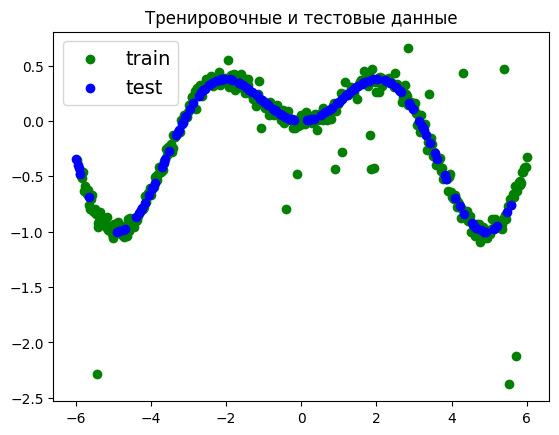

In [41]:
plt.title(f'Тренировочные и тестовые данные')
plt.scatter(X_train, Y_train, color='g', label='train')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.legend(fontsize=14)
plt.show()


## Случайный лес из sklearn

In [42]:
sk_rf = RandomForestRegressor(n_jobs=-1)
sk_rf.fit(X_train, Y_train)
sk_rf_pred = sk_rf.predict(X_test)
print(f'MAPE sk_rf: {mean_absolute_percentage_error(sk_rf_pred, Y_test)}')
print(f'MAE sk_rf: {mean_absolute_error(sk_rf_pred, Y_test)}')

MAPE sk_rf: 0.41649240030059037
MAE sk_rf: 0.039849708316107325


## Кастомный случайный лес

In [43]:
rrf = RobustRandomForest(n_jobs=-1, regression=True)
rrf.fit(X_train, Y_train)
rrf_pred = rrf.predict(X_test)
print(f'MAPE rrf: {mean_absolute_percentage_error(rrf_pred, Y_test)}')
print(f'MAE rrf: {mean_absolute_error(rrf_pred, Y_test)}')

MAPE rrf: 0.5837387351035516
MAE rrf: 0.0386753157740382


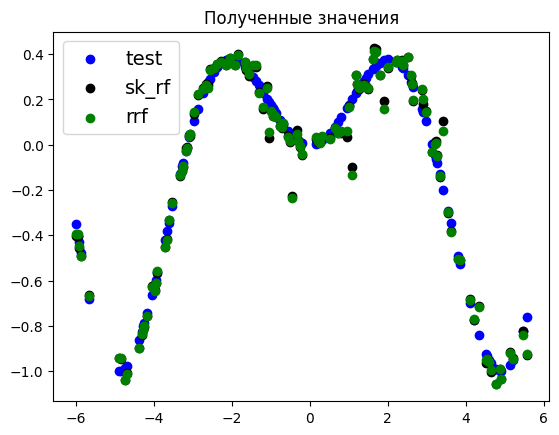

In [44]:
plt.title(f'Полученные значения')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, rrf_pred, color='g', label='rrf')
plt.legend(fontsize=14)
plt.show()

## Случайный лес с потерями Хубера

In [28]:
delta = 0.005
huber_rrf = RobustRandomForest(n_jobs=-1, regression=True, delta=0.0005, robustness='huber')
huber_rrf.fit(X_train, Y_train)
huber_rrf_pred = huber_rrf.predict(X_test)
print(f'MAPE huber_rrf_v1: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')
print(f'MAE huber_rrf_v1: {mean_absolute_error(huber_rrf_pred, Y_test)}')

MAPE huber_rrf_v1: 0.8624297117650739
MAE huber_rrf_v1: 0.07024411535617928


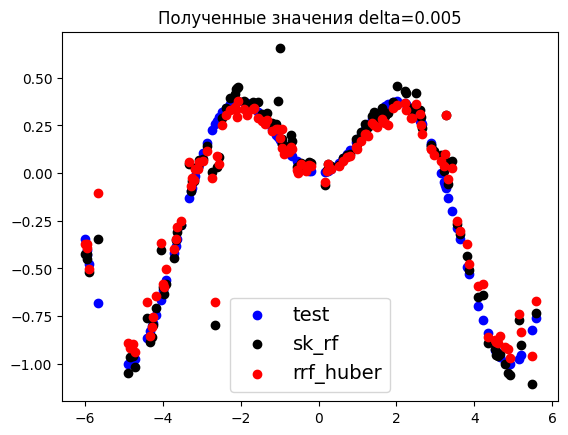

In [29]:
plt.title(f'Полученные значения delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

## Случайный лес с потерями Тьюки

In [20]:
delta = 0.005
tukey_rrf = RobustRandomForest(n_jobs=-1, regression=True, delta=delta)
tukey_rrf.fit(X_train, Y_train)
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAPE tukey_rrf: 0.49357536699149945
Точность mae tukey_rrf: 0.09230041394475588


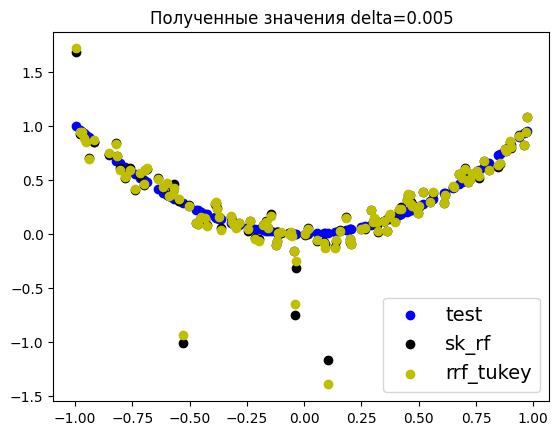

In [21]:
plt.title(f'Полученные значения delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

# Результаты случайного леса с потерями Хубера и Тьюки при разных значениях delta

## delta = 0.001

In [22]:
delta = 0.001

huber_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
huber_rrf.fit(X_train, Y_train)
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'MAPE huber_rrf: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')

tukey_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
tukey_rrf.fit(X_train, Y_train)
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')

MAPE huber_rrf: 0.4971021939918991
MAPE tukey_rrf: 0.4897564235253119


In [23]:
print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAE huber_rrf: 0.07495748073155081
MAE tukey_rrf: 0.09244724730400194


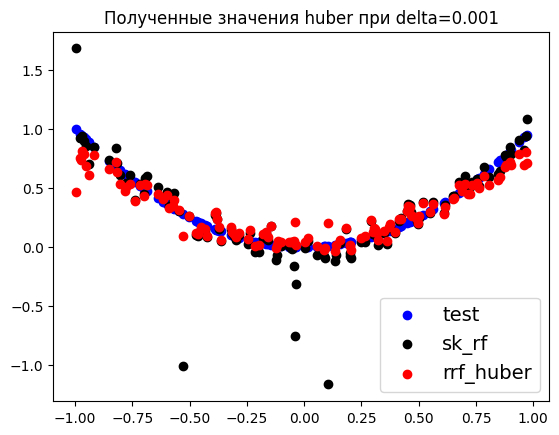

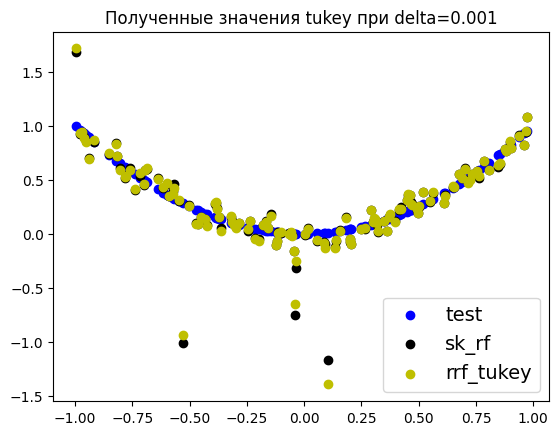

In [24]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.01

In [25]:
delta = 0.01

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'MAPE huber_rrf: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')

MAPE huber_rrf: 0.37892038337837947
MAPE tukey_rrf: 0.5318528086227162


In [26]:
print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAE huber_rrf: 0.08501637633875173
MAE tukey_rrf: 0.0927964449757254


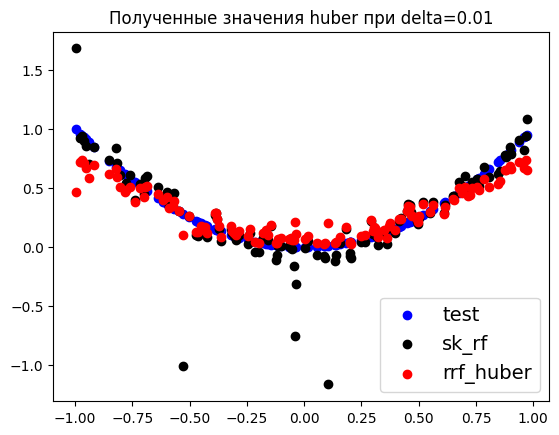

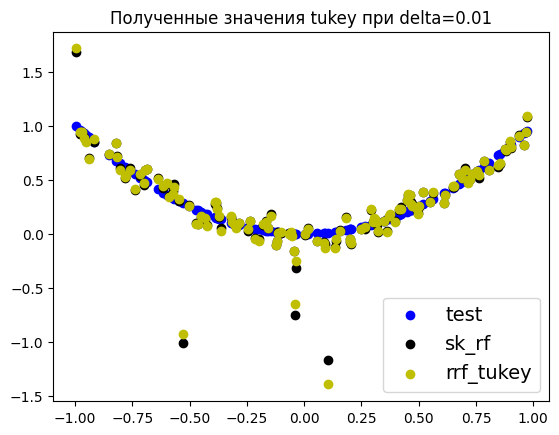

In [27]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.05

In [29]:
delta = 0.05

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'MAPE huber_rrf: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')

MAPE huber_rrf: 0.45537747438642984
MAPE tukey_rrf: 1.259830876699504


In [30]:
print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAE huber_rrf: 0.11394162718958045
MAE tukey_rrf: 0.09203264998358109


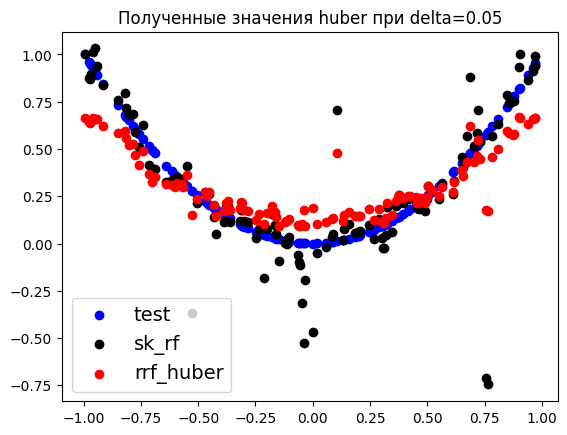

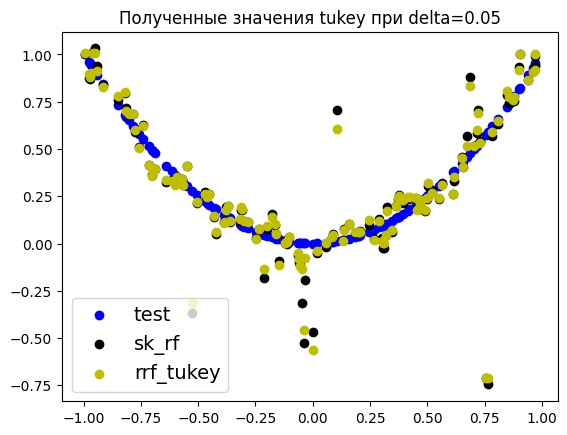

In [32]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.1

In [33]:
delta = 0.1

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'MAPE huber_rrf: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')

MAPE huber_rrf: 0.49485202738215933
MAPE tukey_rrf: 0.42528172578355705


In [34]:
print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAE huber_rrf: 0.1347998101525064
MAE tukey_rrf: 0.08941554227620982


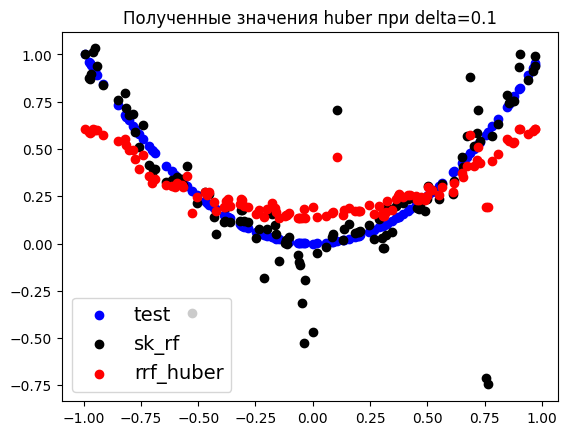

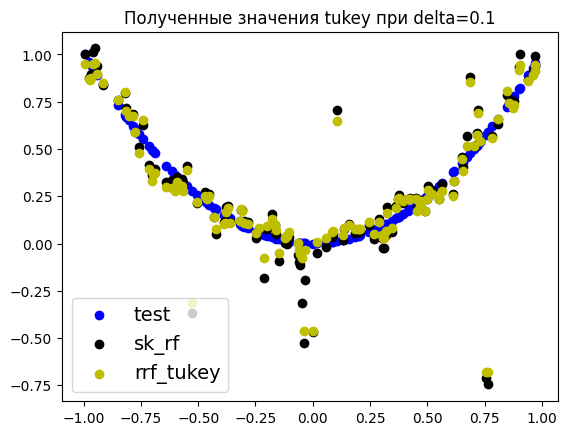

In [35]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.25

In [42]:
delta = 0.25

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'MAPE huber_rrf: {mean_absolute_percentage_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'MAPE tukey_rrf: {mean_absolute_percentage_error(tukey_rrf_pred, Y_test)}')

MAPE huber_rrf: 0.5760505968755388
MAPE tukey_rrf: 0.5166987816439066


In [43]:
print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

MAE huber_rrf: 0.17434772010097951
MAE tukey_rrf: 0.10067515384416661


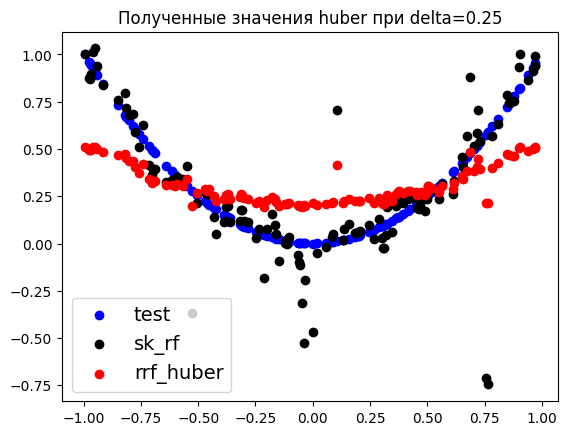

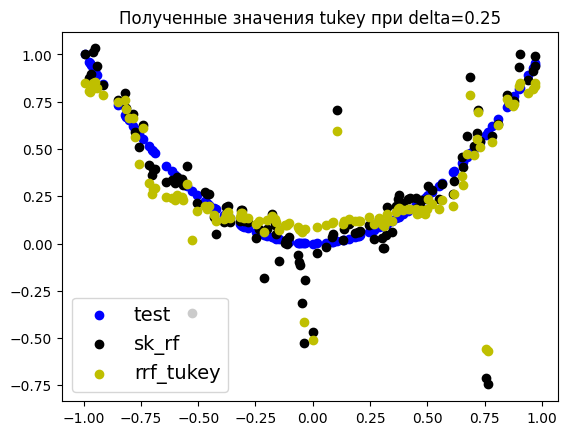

In [44]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()